In [136]:
import numpy as np
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [137]:
arr = np.loadtxt("data2.txt", delimiter=',')
x = arr[:,:-1]
y = arr[:,-1:]
# Append ones for gradient descent
#X = np.c_[ np.ones(x.shape[0]), x ]
poly = PolynomialFeatures(6)
X = poly.fit_transform(x)

In [138]:
def plotData(x, y):
    plt.ylabel("Microchip Test 2")
    plt.xlabel("Microchip Test 1")
    pos = (y==1).nonzero()[:1]
    neg = (y==0).nonzero()[:1]

    plt.plot(x[pos, 0].T, x[pos, 1].T, 'bx', label="y=1")
    plt.plot(x[neg, 0].T, x[neg, 1].T, 'rx', label="y=0")
    plt.legend(frameon= True, fancybox = True)

In [139]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [140]:
def costFunctionReg(theta, lmd, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))

    # Regulation 
    reg = lmd / (2*m) * np.square(theta[1:]).sum()
    sigma = np.log(h).dot(-y) - np.log(1-h).dot(1-y)
    J = 1/m * sigma + reg

    return J[0]

In [141]:
def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad = (1/m)*X.T.dot(h-y) + (reg/m)*np.r_[ [[0]],theta[1:].reshape(-1,1)]
    return(grad.flatten())

In [142]:
def predict(theta, X, threshold=0.5):
    return sigmoid(X.dot(theta.T)) >= threshold

0.69314718055994529

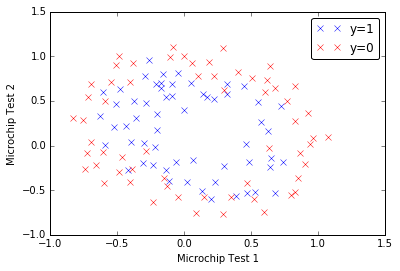

In [143]:
%matplotlib inline
# Plot Data
plotData(x, y)

# Test Cost Function
initial_theta = np.zeros(X.shape[1])
costFunctionReg(initial_theta, 1, X, y)

In [144]:
# Lambda = 0 : No regularization --> over fitting
# Lambda = 1 : Just fine
# Lambda = 100 : Too much regularization --> high bias

for i, C in enumerate([0, 1, 100]):
    # Optimize costFunctionReg
    result = minimize(costFunctionReg, initial_theta, args=(C, X, y), method=None, jac=gradientReg, options={'maxiter':3000})
    # Accuracy
    accuracy = 100*sum(predict(result.x, X) == y.ravel())/y.size    
    print('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))

Train accuracy 91.53% with Lambda = 0
Train accuracy 83.05% with Lambda = 1
Train accuracy 61.02% with Lambda = 100
